# **CIS 520: Machine Learning**

## **Evaluation Metrics**


- **Content Creator:** Mohitrajhu Lingan Kumaraian, Siyun Hu
- **Content Reviewers:** Zhangkaiwen Chu, Parth Sheth
- **Objectives:** The objectives of this notebook are: 
  - Learn how to implement evaluation metrics, such as confusion matrix, accuracy, recall, ROC in Python 
  - Understand how probablility thresholds affect ML model predicions
  - Understand ROC curves 








# Initialize Penn Grader

In [1]:
%%capture
!pip install penngrader

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os 

In [3]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


In [4]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [5]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_Evaluation_Metrics_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [6]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

# Imports

In [7]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score, confusion_matrix,roc_curve,auc
import numpy as np
import matplotlib.pyplot as plt

## **Introduction**

Below is a synthesized dataset. Let's say `y_true` is the true labels of input data and `y_score` is the predicted probability output by a classifier (e.g. Logistic Regression) for the same input data.

In [8]:
y_true = np.array([1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1])
y_score = np.array([0.8,0.3,0.4,0.7,0.9,0.65,0.21,0.55,0.1,0.16,0.37,0.22,0.25,0.49,0.45,0.7,0.75,0.99])


First, if we choose the threshold probability to be 0.5, then y_outcome will be as follows

In [9]:
# Threshold probability
p_thresh = 0.5
y_outcome1 = y_score.copy()
y_outcome1[y_outcome1>p_thresh] = 1
y_outcome1[y_outcome1<=p_thresh] = 0

The confusion matrix for this example is as follows:

**Note:** The sklearn confusion matrix follows the normal convention as shown in the class slides: columns are the true outcome, rows are the predicted outcome.

In [10]:
confusion_matrix(y_true,y_outcome1)

array([[9, 0],
       [1, 8]])

As you can see from above, the outcomes are as follows:

*    True Positives (TP) = 8
*    False Positives (FP) = 0
*    False Negatives (FN) = 1
*    True Negatives (TN) = 9




## *Question 1*

Recall the formulas we learn in the lecture, given the confusion matrix, please calculate the accuracy, precision, recall and F1 score by hand and report a value rounded to 2 decimal places.


In [11]:
accuracy = 0.94
precision = 1.00
recall = 0.89
F1 = 0.94

values = [accuracy, precision, recall, F1]
grader.grade(test_case_id='test_metrics', answer=values)

Correct! You earned 4.0/4.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Varying Probability Thresholds**

In the above example, we use 0.5 as threshold. But what will happen if we change the threshold? Below we try 10 various thresholds and plot the metrics.



In [12]:
# Threshold probability
accuracies = []
recalls = []
precisions = []
f1_scores = []

thresholds = np.arange(0,1,0.1)
for p_thresh in thresholds:
    outcome = y_score.copy()
    outcome[outcome>p_thresh] = 1
    outcome[outcome<=p_thresh] = 0
    accuracies.append(accuracy_score(y_true,outcome))
    recalls.append(recall_score(y_true,outcome))
    precisions.append(precision_score(y_true,outcome))
    f1_scores.append(fbeta_score(y_true,outcome,beta = 1))

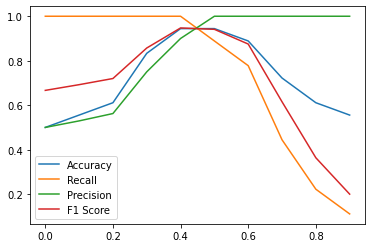

In [13]:
import matplotlib.pyplot as plt

plt.plot(thresholds,accuracies, label = "Accuracy")
plt.plot(thresholds,recalls, label = "Recall")
plt.plot(thresholds,precisions, label = "Precision")
plt.plot(thresholds,f1_scores, label = "F1 Score")
plt.legend()

## *Question 2*

Observe the above graph, take a look at how these metrics change along with the probability thresholds.

What do you think the optimal value of p_threshold? (given that there are no specific requirements for recall or precision)



In [15]:
p_val = 0.5
grader.grade(test_case_id='test_pval', answer=p_val)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **ROC curve**

Besides above metrics, there is another very powerful metric, called ROC curve.

For the above example, the ROC curve is:

 The area under is curve is 1.0


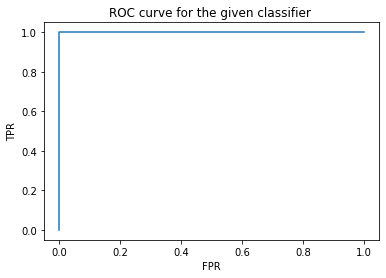

In [16]:
fpr,tpr,_=roc_curve(y_true,y_score,pos_label=1)
plt.plot(fpr,tpr)
plt.title("ROC curve for the given classifier ")
plt.ylabel("TPR")
plt.xlabel("FPR")
print(" The area under is curve is {}".format(auc(fpr,tpr)))

The above classifier is the best possible classifier.  



## *Question 3*

Let's see how the classification score would be for a random classifier, one that classifies every example into positive or negative with a constant probability of 0.5. Think about how the graph should look.

What do you think the area under the curve would be? 



 The area under ROC curve is 0.5


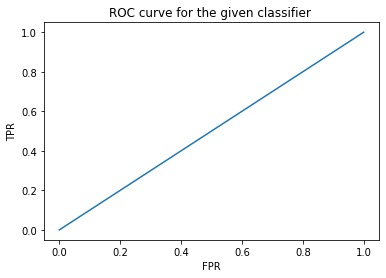

In [17]:
# Run the code block below to find the answer. Did you get what you observed?
## output of random classifier
y_randomscore = np.array([0.5]*18)
fpr,tpr,_=roc_curve(y_true,y_randomscore,pos_label=1)
plt.plot(fpr,tpr)
plt.title("ROC curve for the given classifier ")
plt.ylabel("TPR")
plt.xlabel("FPR")
print(" The area under ROC curve is {}".format(auc(fpr,tpr)))

In [18]:
aoc = 0.5
grader.grade(test_case_id='test_aoc', answer=aoc)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Question 4*

Part 1) Do you think we can have a classifier whose curve is completely below the straight line above? What do you think of such classifier?

Part 2) When do you get an ROC curve with an AUC between 0.5 and 1?

Experiment with this notebook to see how the ROC curve varies in different situations.

 The area under is curve is 0.775


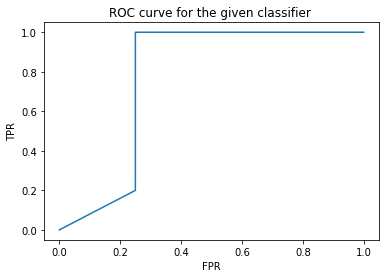

In [19]:
y_true = [1,0,1,1,0,1,0,0,1]
y_score2 = [0.6,0.6,0.55,0.57,0.45,0.51,0.29,0.40,0.51]
fpr,tpr,_ = roc_curve(y_true,y_score2,pos_label=1)
plt.plot(fpr,tpr)
plt.title("ROC curve for the given classifier ")
plt.ylabel("TPR")
plt.xlabel("FPR")
print(" The area under is curve is {}".format(auc(fpr,tpr)))

In [20]:
part1 = "No. It overfits."
part2 = "Model is better than random chance"
grader.grade(test_case_id='test_roc', answer=[part1,part2])

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Submitting to the Autograder


Now go to the File menu and choose "Download .ipynb".  Go to [Gradescope](https://www.gradescope.com/courses/409970) and:

1. From "File" --> Download both .ipynb and .py files
1. Name these files `Evaluation_Metrics_WS.ipynb` and `Evaluation_Metrics_WS.py` respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and ensure  your class is "CIS 5200"
1. Select **Worksheet: Evaluation Metrics**
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

You should be set! Note that this assignment has 8 autograded points that will show up upon submission. Points are awarded based on a combination of correctness and sufficient effort.